А/А-тестирование мобильного приложения. Необходимо посчитать результаты A/A-теста, проверяя метрику качества FPR (будем проверять на конверсии в покупку). Известно, что сплит-система сломана. Требуется проверить утверждение о поломке и найти ее причины, если сплит-система действительно сломана

In [1]:
#Импорт библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [6]:
#Загрузка датафрейма
df = pd.read_csv(r'C:\Users\Пользователь\OneDrive\Документы\Statistic_data\Lesson_10\hw_aa.csv', sep=';')
df.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [4]:
#Оценка размеров экспериментальных групп
df.experimentVariant.value_counts()

1    63916
0    63102
Name: experimentVariant, dtype: int64

In [14]:
#Оценка распределения по версиям
df.version.value_counts()

v2.8.0      82835
v2.9.0      23954
v3.8.0.0    11804
v3.7.4.0     8425
Name: version, dtype: int64

In [ ]:
#АА тест по группам по всем версиям

  0%|          | 0/1000 [00:00<?, ?it/s]

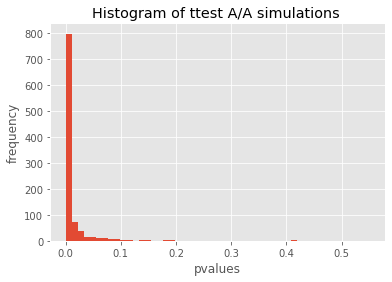

0.933

In [25]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[df['experimentVariant'] == 1]['purchase'].sample(n_s, replace = False).values
    s2 = df[df['experimentVariant'] == 0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

FPR > альфа

Сплит-система действительно сломана

In [27]:
#Конверсия по экспериментальным группам
df.groupby('experimentVariant', as_index=False) \
    .agg({'purchase': 'mean'})

,experimentVariant,purchase
0,0,0.023945
1,1,0.053242


Существенная разница в коверсии по экспериментальным группам, что подтверждает результаты АА-теста для всех версий

In [28]:
#Конверсия по версиям
df.groupby('version', as_index=False) \
    .agg({'purchase': 'mean'})

,version,purchase
0,v2.8.0,0.023372
1,v2.9.0,0.072973
2,v3.7.4.0,0.061484
3,v3.8.0.0,0.060319


In [ ]:
#Скорее всего проблема в пользователях версии v2.8.0

In [93]:
#Переведем запрос в фунуцию и проверим все версии
def aa_test(df1, df2):

    n = 100000
    simulations = 1000
    n_s = 1000
    res = []


    # Запуск симуляций A/A теста
    for i in tqdm(range(simulations)):
        s1 = df1.sample(n_s, replace = False).values
        s2 = df2.sample(n_s, replace = False).values
        res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue
    
    plt.hist(res, bins = 50)
    plt.style.use('ggplot')
    plt.xlabel('pvalues')
    plt.ylabel('frequency')
    plt.title("Histogram of ttest A/A simulations ")
    
    return plt.show(), sum(np.array(res) <0.05) / simulations

In [ ]:
#Для точглсти выыодов с помощью функции проверим АА-тесты по всем вресиям для экспериментальных групп

In [96]:
#Версия v2.8.0
df1_v2_8_0 = df[df['version'] == 'v2.8.0'][df['experimentVariant'] == 1]['purchase']
df2_v2_8_0 = df[df['version'] == 'v2.8.0'][df['experimentVariant'] == 0]['purchase']

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2720/1788298911.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_v2_8_0 = df[df['version'] == 'v2.8.0'][df['experimentVariant'] == 1]['purchase']
C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2720/1788298911.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_v2_8_0 = df[df['version'] == 'v2.8.0'][df['experimentVariant'] == 0]['purchase']


In [99]:
#Версия v2.9.0
df1_v2_9_0 = df[df['version'] == 'v2.9.0'][df['experimentVariant'] == 1]['purchase']
df2_v2_9_0 = df[df['version'] == 'v2.9.0'][df['experimentVariant'] == 0]['purchase']

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2720/710502466.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_v2_9_0 = df[df['version'] == 'v2.9.0'][df['experimentVariant'] == 1]['purchase']
C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2720/710502466.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_v2_9_0 = df[df['version'] == 'v2.9.0'][df['experimentVariant'] == 0]['purchase']


In [101]:
#Версия v3.7.4.0
df1_v3_7_4_0 = df[df['version'] == 'v3.7.4.0'][df['experimentVariant'] == 1]['purchase']
df2_v3_7_4_0 = df[df['version'] == 'v3.7.4.0'][df['experimentVariant'] == 0]['purchase']

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2720/3983447995.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_v3_7_4_0 = df[df['version'] == 'v3.7.4.0'][df['experimentVariant'] == 1]['purchase']
C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2720/3983447995.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_v3_7_4_0 = df[df['version'] == 'v3.7.4.0'][df['experimentVariant'] == 0]['purchase']


In [104]:
#Версия v3.8.0.0
df1_v3_8_0_0 = df[df['version'] == 'v3.8.0.0'][df['experimentVariant'] == 1]['purchase']
df2_v3_8_0_0 = df[df['version'] == 'v3.8.0.0'][df['experimentVariant'] == 0]['purchase']

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2720/2485261118.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_v3_8_0_0 = df[df['version'] == 'v3.8.0.0'][df['experimentVariant'] == 1]['purchase']
C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2720/2485261118.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_v3_8_0_0 = df[df['version'] == 'v3.8.0.0'][df['experimentVariant'] == 0]['purchase']


In [ ]:
#Результаты АА-тестов по всем версиям

  0%|          | 0/1000 [00:00<?, ?it/s]

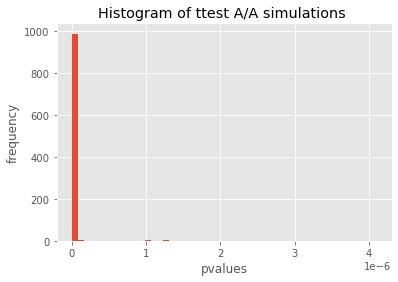

(None, 1.0)

In [149]:
aa_test(df1_v2_8_0, df2_v2_8_0)

  0%|          | 0/1000 [00:00<?, ?it/s]

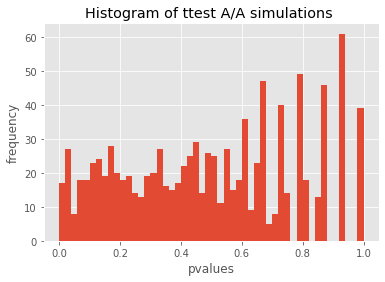

(None, 0.048)

In [107]:
aa_test(df1_v2_9_0, df2_v2_9_0)

  0%|          | 0/1000 [00:00<?, ?it/s]

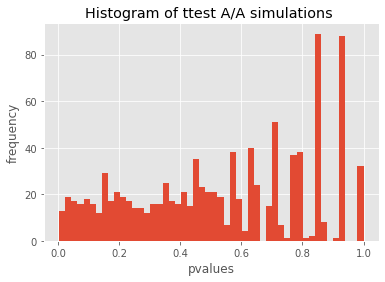

(None, 0.038)

In [103]:
aa_test(df1_v3_7_4_0, df2_v3_7_4_0)

  0%|          | 0/1000 [00:00<?, ?it/s]

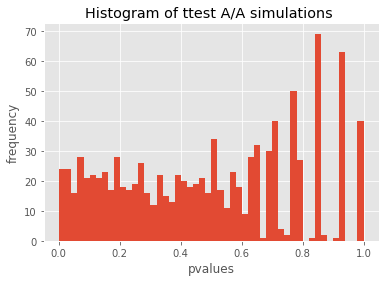

(None, 0.052)

In [151]:
aa_test(df1_v3_8_0_0, df2_v3_8_0_0)

Проблема в версии v2.8.0, исключим пользователей данной версии из датафрейма и проведем АА-тест для пользователей версий 'v2.9.0', 'v3.7.4.0', 'v3.8.0.0'

In [152]:
version_spisok = list(df.version.unique())
version_spisok.pop(0)
version_spisok

['v2.9.0', 'v3.7.4.0', 'v3.8.0.0']

In [146]:
df_final = df.query("version in @version_spisok")
df_final.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
6,7,8f14e45fceea167a5a36dedd4bea2543,0,v2.9.0,0
10,11,6512bd43d9caa6e02c990b0a82652dca,1,v2.9.0,0
13,14,aab3238922bcc25a6f606eb525ffdc56,1,v2.9.0,0


In [147]:
#АА-тест для экспериментальных групп (исключили версию v2.8.0)
df_final_1 = df_final[df_final['experimentVariant'] == 1]['purchase']
df_final_2 = df_final[df_final['experimentVariant'] == 0]['purchase']

  0%|          | 0/1000 [00:00<?, ?it/s]

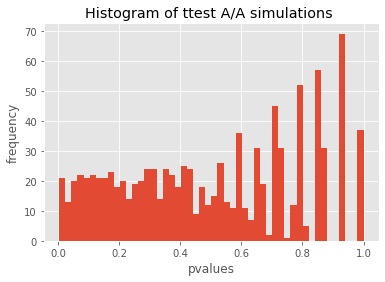

(None, 0.037)

In [148]:
aa_test(df_final_1, df_final_2)

In [ ]:
FPR < альфа

Сплит-система работает

In [168]:
#Распределение значений по покупкам в экспериментальных группах для версии v.2.8.0

In [166]:
df1_v2_8_0.value_counts()

0    39657
1     1895
Name: purchase, dtype: int64

In [167]:
df2_v2_8_0.value_counts()

0    41242
1       41
Name: purchase, dtype: int64

In [169]:
#Распределение значений по покупкам в экспериментальных группах, датафрейм исключает версию v.2.8.0

In [164]:
df_final_1.value_counts()

0    20856
1     1508
Name: purchase, dtype: int64

In [165]:
df_final_2.value_counts()

0    20349
1     1470
Name: purchase, dtype: int64

***ЗАКЛЮЧЕНИЕ***

На исходом датафрейме неокрректно работает сплит-система.
Установлено, что на корректность работы влияет группа пользователей с версией v2.8.0. Подтверждается высоким p-value (более 0.05), также подтверждено значительной разницей в конверсии внутри экспериментальных групп пользователей с версией v2.8.0.

После исключения пользователей с версией v.2.8.0 из датафрейма сплит система работает корректно, могут быть проведены дальнейшие тесты (АВ-тесты).

In [171]:
df[(df.version == 'v2.8.0') & (df.experimentVariant == 1)]['purchase']

0         0
3         0
4         0
5         0
7         0
         ..
127005    0
127009    0
127010    0
127016    0
127017    0
Name: purchase, Length: 41552, dtype: int64

In [172]:
df[(df['version'] == 'v2.8.0') & (df['experimentVariant'] == 1)]['purchase']

0         0
3         0
4         0
5         0
7         0
         ..
127005    0
127009    0
127010    0
127016    0
127017    0
Name: purchase, Length: 41552, dtype: int64

In [175]:
df[df['version'] == 'v2.8.0'][df['experimentVariant'] == 1][df['purchase'] == 1][df['Unnamed: 0'] == 36]

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_2720/956290295.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['version'] == 'v2.8.0'][df['experimentVariant'] == 1][df['purchase'] == 1][df['Unnamed: 0'] == 36]


,Unnamed: 0,uid,experimentVariant,version,purchase
35,36,19ca14e7ea6328a42e0eb13d585e4c22,1,v2.8.0,1
